BL3CenterAnalysis
============

This was a model including the 4-jaw slit, collimators c1 and C2 and then detectors at the 8m position of the neutron detector. For this model, both x and y jaws were closed down leaving a 1cm square central opening.

At the detector position are a position sensitive detector (psd), a full-coverage wavelength monitor (LMon), and a grid of 9 wavelength monitors with the central row and column being 1 cm wide/tall and the outer blocks 5 cm wide to ensure that they catch all the neutrons in their segment of the detector space.

We start by loading tools and reading in the output of the position sensitive detector.

In [1]:
import sys
sys.path.insert(0, '/Users/bcollett/Research/BL3/NeutronSpectrum/mcstas_local/pytools')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nspectrum import NSpectrum
from psd import PSDData

Load psd file BL3Front1cmBack/Blackbox.psd
Read 338 lines from BL3Front1cmBack/Blackbox.psd
Line 32 # Data [psd_monitor/Blackbox.psd] I:

Intensity block starts at line 33
Line 33 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Found 101 columns.
End of first block.
Line 133 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Line 134 # Errors [psd_monitor/Blackbox.psd] I_err:

error block starts at line 33
Found 101 rows.
<class 'numpy.ndarray'>
(2, 2)


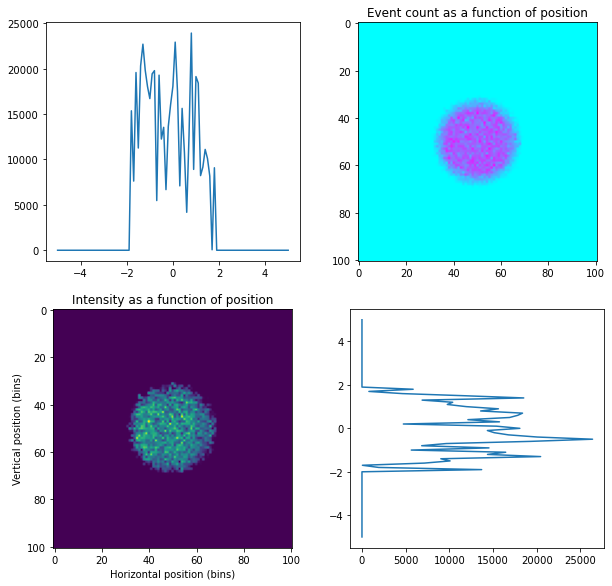

In [3]:
im1 = PSDData('BL3Front1cmBack/Blackbox.psd')
im1.plot()

We see that the counts are pretty central, as expected. The spot is quite noisy indicating the relatively small total number of neutrons.

Next let's look at the overall spectrum.

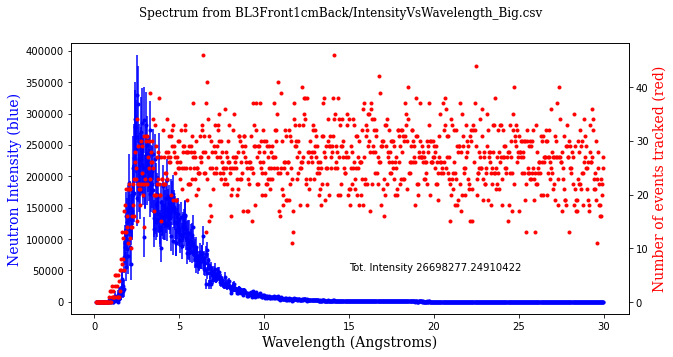

In [4]:
full = NSpectrum('BL3Front1cmBack/IntensityVsWavelength_Big.csv')
full.plot()

In [5]:
fullC1, fullEC = full.C1()
print(f'Full C1 = {fullC1}+-{fullEC} s')

Full C1 = 5.039165068170323+-0.0008161786334804628 s


That is a little higher than the C1 for the full beam, but well within the 0.1s limit.

Now we have to read in the 9 individual monitors.

In [6]:
mon = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for i in range(3):
    for j in range(3):
        print(f'Load LMon{i}{j}csv.dat')
        mon[i][j] = NSpectrum(f'BL3Front1cmBack/LMon{i}{j}csv.dat')

Load LMon00csv.dat
Load LMon01csv.dat
Load LMon02csv.dat
Load LMon10csv.dat
Load LMon11csv.dat
Load LMon12csv.dat
Load LMon20csv.dat
Load LMon21csv.dat
Load LMon22csv.dat


Now we would like to see what they look like.

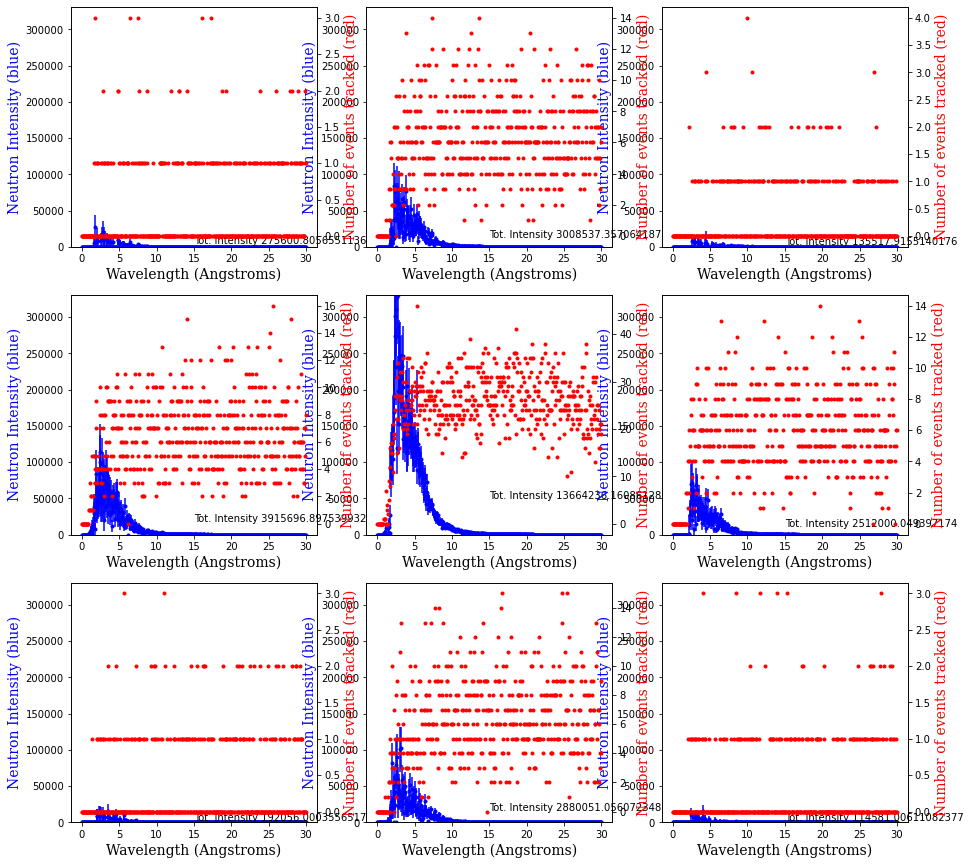

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
max = mon[1][1].max_inten
for i in range(3):
    for j in range(3):
        mon[i][j].plotOn(axes[i][j])
        axes[i][j].set_ylim(bottom=0.0, top=max)
# plt.tight_layout()

So that is VERY interesting and rather worrying. Only the central spot looks like a good spectrum and has anything like enough counts to do a C1. What is most owrrying is the digitization in the numbers of neutrons at different wavelengths.

So what does the central C1 look like?

In [10]:
cc, ec = mon[1][1].C1()
print(f'{cc}+/-{ec}')

4.989454105505675+/-0.0012043872678599694


Oh dear! That, coming from 13M neutrons, is a little different from the full beam value even though that beam came from only 16M neutrons. To be fair, the difference is still only 0.04s and so within our tolerance.

Note that we are actually closer to the whole beam number. There the difference is only 0.024s.